### Introduction

In the digital age, the abundance of choices can make finding the perfect restaurant an overwhelming task. With countless dining options available, how can one ensure they are making the best choice? This is where recommendation systems come into play. By harnessing the power of Natural Language Processing (NLP), we can transform the way users discover new restaurants.
Problem Statement
Design and implement a recommendation system for restaurants based on customer reviews.
The goal is to develop a system that suggests restaurants to users based on their preferences and historical review data.


## Problem Statement

- Design and implement a recommendation system for restaurants based on customer reviews.
- The **goal** is to develop a system that suggests restaurants to users based on their preferences and historical review data.

#### Why

The purpose of creating a restaurant recommendation system based on customer reviews is to enhance user satisfaction by providing personalized dining suggestions and to drive business growth through data-driven insights and increased user engagement.
For instance, if you are visiting a new city and don't know where to eat, the system can analyze reviews from other customers with similar tastes and recommend the best restaurants for you. This not only ensures a great dining experience for you but also helps restaurants attract more customers through targeted recommendations.

#### What

Objective : Design and implement a recommendation system that analyzes customer reviews to suggest restaurants to users.
Components : Utilize data preprocessing, NLP Preprocessing, and recommendation algorithms to generate personalized restaurant recommendations.

#### How

Implementation of NLP techniques to analyze customer reviews.
The approach involves several key steps :
1. Data Collection and Preparation
2. Exploratory Data Analysis (EDA)
3. NLP Preprocessing
4. Feature Extraction
5. Topic Modelling
6. Recommendation Algorithm
7. Deployment and Integration

## Task 1.  Data Collection and Preparation

In [1]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cerebrus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Importing libraries 

In [3]:
'''
The os library is used for working with the file system and performing various system-related tasks in Python.
The re library provides support for regular expressions.
The nltk library is used for Natural Language Processing in Python. NLTK is a powerful library for working with human language data, often used for tasks such as text analysis, natural language processing (NLP), and machine learning with text.
Import the numpy library for performing a wide range of mathematical calculations and efficiently managing arrays and matrices.
Import the pandas library for data manipulation, analysis, and preprocessing. It is associated with the manipulation of tabular data in DataFrames.
The FreqDist class from the NLTK (Natural Language Toolkit) library is used to compute and work with the frequency distribution of items in a list.
Chain is a function provided by the itertools module in Python's standard library. 
A RegexpTokenizer splits a string into substrings using a regular expression.
The load_files function from sklearn is a utility function that allows to load a dataset from a directory structure on filesystem.
The nltk.tokenize.sent_tokenize function is used to tokenize a text into sentences using NLTK (Natural Language Toolkit).
'''
import os
import re
import re
import html
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import FreqDist
from itertools import chain
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from scipy.sparse.linalg import svds
from sklearn.datasets import load_files 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


### 1.1 Examining and loading data

In [4]:
'''
CSV file is located in the 'data' folder.
Load the CSV file into a DataFrame.
Display the first few rows of the dataset.
'''
file_path = 'data/Restaurant reviews.csv'
DataFrame = pd.read_csv(file_path)
DataFrame.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [5]:
'''
Display the last few rows of the dataset.
'''
DataFrame.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,NaN
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,NaN
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,NaN
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6,NaN


In [6]:
'''
Display information about the DataFrame structure.
'''
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [7]:
'''
Display summary statistics of the DataFrame
'''
DataFrame.describe()

,Pictures,7514
count,10000.000000,1.0
mean,0.748600,2447.0
std,2.570381,NaN
min,0.000000,2447.0
25%,0.000000,2447.0
50%,0.000000,2447.0
75%,0.000000,2447.0
max,64.000000,2447.0


In [8]:
'''
Display comprehensive summary using describe.
Transpose the result using .T to switch rows and columns for better readability.
Round all numerical values to two decimal places for cleaner output using .round(2).
'''
DataFrame.describe(include="all").T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0
7514,1.0,NaN,NaN,NaN,2447.0,NaN,2447.0,2447.0,2447.0,2447.0,2447.0


In [9]:
'''
Display the shape of the DataFrame.
'''
DataFrame.shape

(10000, 8)

In [10]:
'''
Identify numerical and categorical variables.
'''
numerical_variables = DataFrame.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_variables = DataFrame.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_variables)
print('Categorical variables:', categorical_variables)

Numerical variables: ['Pictures', '7514']
Categorical variables: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time']


In [11]:
'''
Count the number of categorical and numerical variables.
'''
categorical_count = DataFrame.select_dtypes(include='object').shape[1]
numerical_count = DataFrame.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 6
Number of numerical variables: 2


In [12]:
'''
Unique values for categorical features
'''
print(DataFrame.select_dtypes(include=['object']).nunique())

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
dtype: int64


The column '7514' has only one unique value (2447), and rest are blank values , neither of which contributes meaningful information to the dataset.

In [13]:
'''
Drop the 7514 column.
'''
DataFrame.drop(columns=['7514'], inplace=True)

To streamline further analysis and improve dataset relevance, the decision is made to remove column '7514' entirely. This action is justified as the column's content does not provide useful variability or contribute meaningfully to the analysis goals.

In [14]:
'''
Calculate missing values. 
Display information about missing values.
'''
missing_values =  DataFrame.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_values["Percentage of Missing Values"] = round((missing_values["Total No. of Missing Values"]/len(DataFrame))*100,2)
missing_values

,Total No. of Missing Values,Percentage of Missing Values
Restaurant,0,0.00
Reviewer,38,0.38
Review,45,0.45
Rating,38,0.38
Metadata,38,0.38
Time,38,0.38
Pictures,0,0.00


Use the mode (most frequent value) of each **categorical variable** to replace missing values. This approach ensures that the imputed values are typical and representative of the majority of observations in each categorical column.

In [15]:
'''
Handling the missing values
Imputing missing values with mode for categorical variables
'''
for col in DataFrame.columns:
    if DataFrame[col].dtype == 'object':
        DataFrame[col].fillna(DataFrame[col].mode()[0], inplace=True)

missing_values = DataFrame.isnull().sum()

In [16]:
'''
Calculate missing values. 
Display information about missing values.
'''
missing_dataframe =  DataFrame.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_dataframe["Percentage of Missing Values"] = round((missing_dataframe["Total No. of Missing Values"]/len(DataFrame))*100,2)
missing_dataframe

,Total No. of Missing Values,Percentage of Missing Values
Restaurant,0,0.0
Reviewer,0,0.0
Review,0,0.0
Rating,0,0.0
Metadata,0,0.0
Time,0,0.0
Pictures,0,0.0


In [17]:
'''
Display the rows that are duplicated.
'''
DataFrame[DataFrame.duplicated(keep=False)]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8777,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0
8778,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0
8779,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0
8780,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0
8781,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0
8782,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0
8783,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0
8784,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0
8785,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0
8786,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0


In [18]:
'''
Calculate and display the sum of duplicated rows.
'''
DataFrame.duplicated().sum()

36

In [19]:
'''
Drop the duplicate rows from the DataFrame.
'''
DataFrame.drop_duplicates(inplace=True)

In [20]:
'''
Display the shape of the DataFrame after removing duplicate rows.
'''
DataFrame.shape

(9964, 7)

In [21]:
'''
Inspect the features that are unique.
'''
DataFrame.nunique().sort_values()

Rating          10
Pictures        36
Restaurant     100
Metadata      2477
Reviewer      7446
Review        9364
Time          9782
dtype: int64

In [22]:
'''
Check the unique values and frequency for the column 'Rating'
'''
DataFrame['Rating'].value_counts()

5       3834
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

The data in the 'Rating' column contains an unexpected value "Like".

In [23]:
'''
Calculate the mode of the Rating column (excluding 'Like')
'''
mode_rating = DataFrame[DataFrame['Rating'] != 'Like']['Rating'].mode()[0]
mode_rating 

'5'

 I will replace the string 'Like' with mode_rating, which represents the most frequent value in the Rating column.

In [24]:
"""
Replace 'Like' with the mode_rating value.
"""
DataFrame['Rating'] = DataFrame['Rating'].replace(['Like'], mode_rating)

In [25]:
"""
Check the unique values and frequency for the column 'Rating'
"""
DataFrame['Rating'].value_counts()

5      3835
4      2373
1      1735
3      1193
2       684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [26]:
print(DataFrame.dtypes)

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object


In [27]:
'''
Convert the 'review' column to float 
'''
DataFrame['Rating'] = DataFrame['Rating'].astype(float)

In [28]:
print(DataFrame.dtypes)

Restaurant     object
Reviewer       object
Review         object
Rating        float64
Metadata       object
Time           object
Pictures        int64
dtype: object


In [29]:
'''
NLP tasks are performed on the Review and Rating columns.
'''
selected_columns = ['Restaurant','Reviewer','Review', 'Rating','Time']
DataFrame[selected_columns]

,Restaurant,Reviewer,Review,Rating,Time
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37
...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,6/5/2016 0:08
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,6/4/2016 22:01
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,6/3/2016 10:37
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,5/31/2016 17:22


In [30]:
'''
Print DataFrame of 'Review' for location 0
'''
print(DataFrame.loc[0, 'Review'])

The ambience was good, food was quite good . had Saturday lunch , which was cost effective .
Good place for a sate brunch. One can also chill with friends and or parents.
Waiter Soumen Das was really courteous and helpful.


### Step 2 : Exploratory Data Analysis (EDA)

Maximum rating: 5.0 with count 3835
Minimum rating: 1.5 with count 9


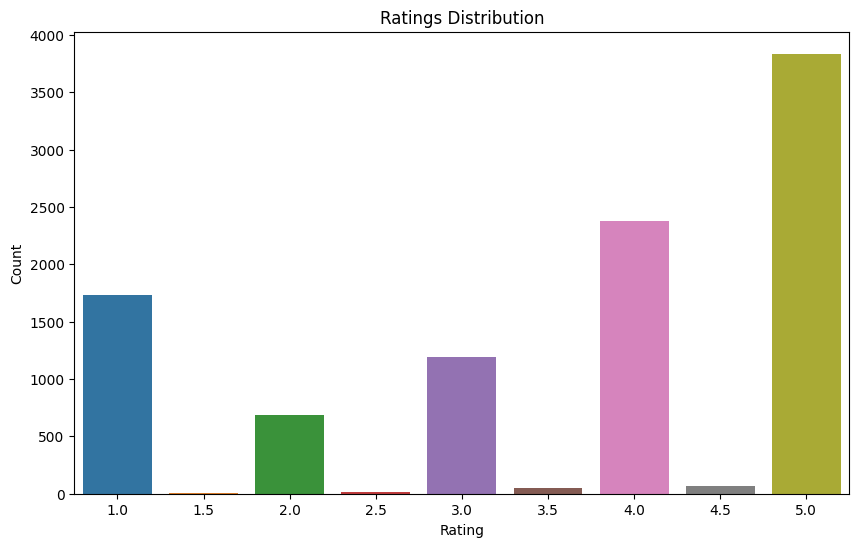

In [31]:
'''
To Calculate rating counts.
To print the values of minimum and maximum ratings
To find the distribution of Ratings
'''
rating_counts = DataFrame['Rating'].value_counts()
max_rating = rating_counts.idxmax()
min_rating = rating_counts.idxmin()

print(f"Maximum rating: {max_rating} with count {rating_counts[max_rating]}")
print(f"Minimum rating: {min_rating} with count {rating_counts[min_rating]}")

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=DataFrame)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Observation

- The highest rating observed is 5.0, with a count of 3835 reviews.

- The lowest rating observed is 1.5, with only 9 reviews.

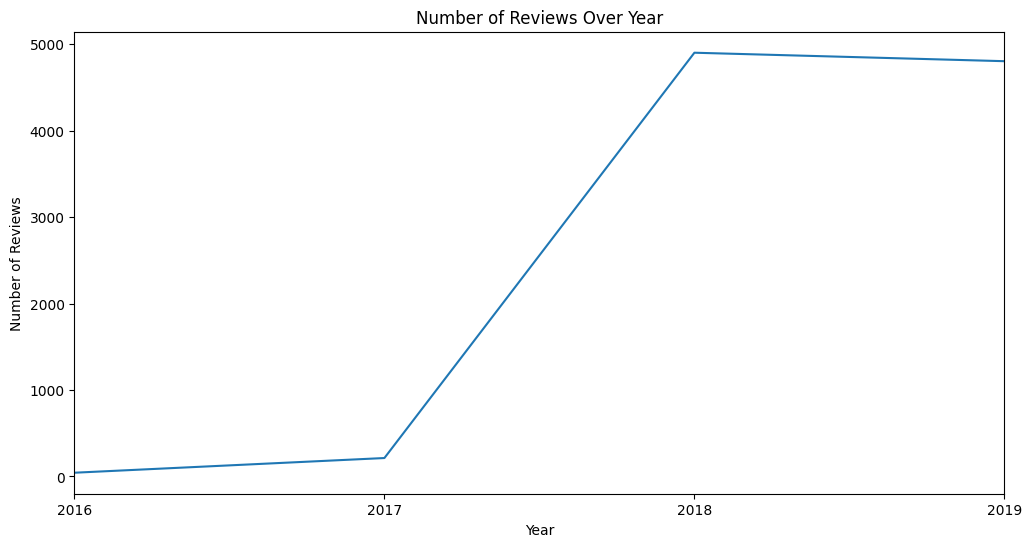

The year with the highest number of reviews is 2018 with 4903 reviews.


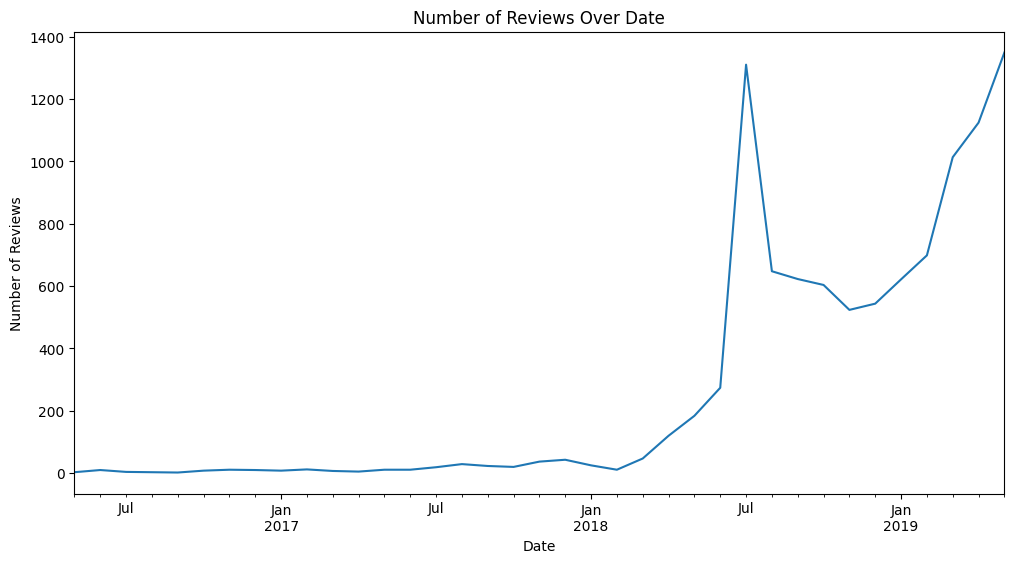

The month with the highest number of reviews is May 2019 with 1349 reviews.


In [32]:
# Convert 'Time' column to datetime
DataFrame['Time'] = pd.to_datetime(DataFrame['Time'])

# Number of Reviews over Year
reviews_over_year = DataFrame.set_index('Time').resample('Y').size()

# Identify the year with the highest number of reviews
max_year = reviews_over_year.idxmax()
max_reviews = reviews_over_year.max()

plt.figure(figsize=(12, 6))
reviews_over_year.plot()
plt.title('Number of Reviews Over Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

# Print the year with the highest number of reviews
print(f"The year with the highest number of reviews is {max_year.year} with {max_reviews} reviews.")

# Number of Reviews over Month
reviews_over_month = DataFrame.set_index('Time').resample('M').size()

# Identify the month with the highest number of reviews
max_month = reviews_over_month.idxmax()
max_reviews_month = reviews_over_month.max()

plt.figure(figsize=(12, 6))
reviews_over_month.plot()
plt.title('Number of Reviews Over Date')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

# Print the month with the highest number of reviews
print(f"The month with the highest number of reviews is {max_month.strftime('%B %Y')} with {max_reviews_month} reviews.")

Observation

1. Number of Reviews over Year:

- The year with the highest number of reviews is 2018, totaling 4903 reviews.

2. Number of Reviews over Month:

- Among all months, May 2019 stands out with the highest number of reviews, totalling 1349 reviews.


In [33]:
# Calculate restaurant counts
restaurant_counts = DataFrame['Restaurant'].value_counts()

# Count occurrences of each review count
count_distribution = restaurant_counts.value_counts().sort_index()
count_distribution

78      1
86      1
100    98
Name: Restaurant, dtype: int64

In [34]:
for review_count in count_distribution.index:
    # Filter the DataFrame for restaurants with the current review_count
    restaurants_with_count = DataFrame[DataFrame['Restaurant'].map(restaurant_counts) == review_count]['Restaurant'].unique()
    
    # Print the review count and corresponding restaurant names
    print(f"\nRestaurants with {review_count} reviews:")
    for restaurant in restaurants_with_count:
        print(restaurant)


Restaurants with 78 reviews:
American Wild Wings

Restaurants with 86 reviews:
Arena Eleven

Restaurants with 100 reviews:
Beyond Flavours
Paradise
Flechazo
Shah Ghouse Hotel & Restaurant
Over The Moon Brew Company
The Fisherman's Wharf
eat.fit
Shah Ghouse Spl Shawarma
Hyper Local
Cream Stone
Sardarji's Chaats & More
Barbeque Nation
Absolute Sizzlers
The Lal Street - Bar Exchange
AB's - Absolute Barbecues
KFC
NorFest - The Dhaba
Hotel Zara Hi-Fi
10 Downing Street
Pakwaan Grand
13 Dhaba
Jonathan's Kitchen - Holiday Inn Express & Suites
B-Dubs
Amul
SKYHY
Tiki Shack
Mustang Terrace Lounge
3B's - Buddies, Bar & Barbecue
Behrouz Biryani
Hunger Maggi Point
Pot Pourri
Pista House
Marsala Food Company
Club Rogue
Mazzo - Marriott Executive Apartments
Green Bawarchi Restaurant
Banana Leaf Multicuisine Restaurant
Kritunga Restaurant
The Glass Onion
Deli 9 Bistro
Frio Bistro
Karachi Bakery
Karachi Cafe
The Foodie Monster Kitchen
La La Land - Bar & Kitchen
Owm Nom Nom
Ulavacharu
Shanghai Chef 2
Ud

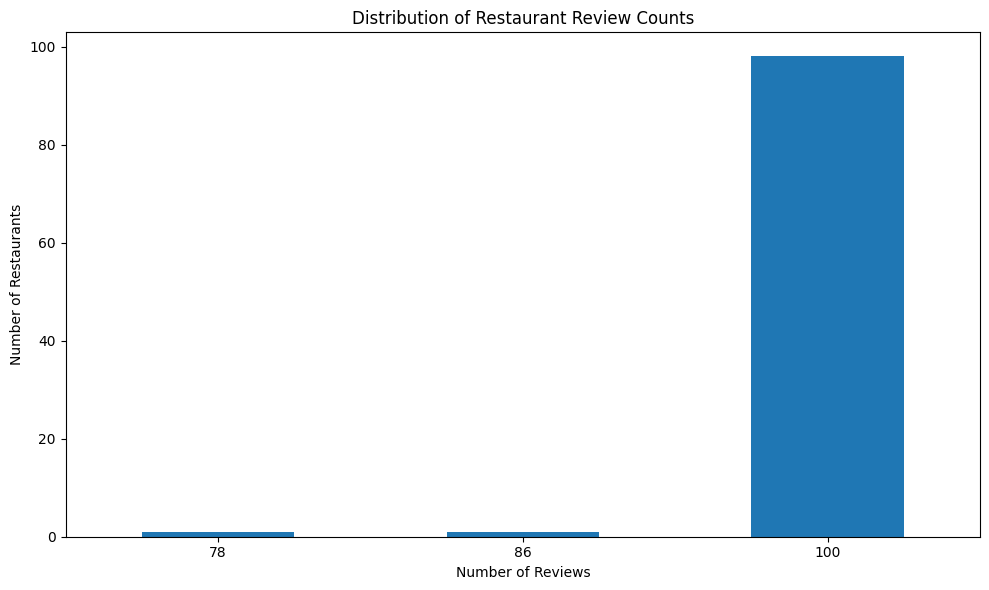

In [35]:
count_distribution.plot(kind='bar', figsize=(10, 6))

plt.title('Distribution of Restaurant Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Restaurants')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Observation

- 1 restaurant  has 78 reviews.

- 1 restaurant has 86 reviews.

- 98 restaurants have 100 reviews.

### Step 3  :   NLP  Preprocessing


#### i. Tokenize Data 

To tokenize the 'Review' column and convert all words to lowercase using regex.

In [36]:
"""
Define regex patterns for URLs, emails, and user mentions
Remove numbers and characters from text
Remove white space
Convert to lowercase
Remove URLs, emails, and user mentions
Replace hashtags with space
Unescape HTML characters
Filter out empty reviews
"""

url_regex = r'http\S+|www\S+'
email_regex = r'\S+@\S+'
user_regex = r'@\w+'

def clean_data(DataFrame):
    DataFrame['Review'] = DataFrame['Review'].str.replace("[^a-zA-Z]", " ", regex=True)
    DataFrame['Review'] = DataFrame['Review'].str.replace(" +", " ", regex=True)
    DataFrame['Review'] = DataFrame['Review'].str.strip()
    DataFrame['Review'] = DataFrame['Review'].str.lower()
    DataFrame['Review'] = DataFrame['Review'].str.replace(url_regex, "", regex=True)
    DataFrame['Review'] = DataFrame['Review'].str.replace(email_regex, "", regex=True)
    DataFrame['Review'] = DataFrame['Review'].str.replace(user_regex, "", regex=True)
    DataFrame['Review'] = DataFrame['Review'].str.replace("#", " ")
    DataFrame['Review'] = DataFrame['Review'].apply(html.unescape)
    DataFrame = DataFrame[DataFrame['Review'] != '']
   
    return DataFrame

DataFrame = clean_data(DataFrame)
DataFrame[selected_columns]

,Restaurant,Reviewer,Review,Rating,Time
0,Beyond Flavours,Rusha Chakraborty,the ambience was good food was quite good had ...,5.0,2019-05-25 15:54:00
1,Beyond Flavours,Anusha Tirumalaneedi,ambience is too good for a pleasant evening se...,5.0,2019-05-25 14:20:00
2,Beyond Flavours,Ashok Shekhawat,a must try great food great ambience thnx for ...,5.0,2019-05-24 22:54:00
3,Beyond Flavours,Swapnil Sarkar,soumen das and arun was a great guy only becau...,5.0,2019-05-24 22:11:00
4,Beyond Flavours,Dileep,food is good we ordered kodi drumsticks and ba...,5.0,2019-05-24 21:37:00
...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,madhumathi mahajan well to start with nice cou...,3.0,2016-06-05 00:08:00
9996,Chinese Pavilion,Sharad Agrawal,this place has never disappointed us the food ...,4.5,2016-06-04 22:01:00
9997,Chinese Pavilion,Ramandeep,bad rating is mainly because of chicken bone f...,1.5,2016-06-03 10:37:00
9998,Chinese Pavilion,Nayana Shanbhag,i personally love and prefer chinese food had ...,4.0,2016-05-31 17:22:00


In [37]:
'''
Print cleaned review for observation 0
'''
print("\nCleaned Review for Observation 0:")
print(DataFrame.loc[0, 'Review'])


Cleaned Review for Observation 0:
the ambience was good food was quite good had saturday lunch which was cost effective good place for a sate brunch one can also chill with friends and or parents waiter soumen das was really courteous and helpful


Regex patterns used 

1. url_regex = r'http\S+|www\S+'


- Matches URLs starting with "http" or "www".

- Purpose: Identifies and removes URLs from text data.


2. email_regex = r'\S+@\S+'

- Matches email addresses.

- Purpose: Identifies and removes email addresses from text data.

3. user_regex = r'@\w+'

- Matches user mentions starting with "@" followed by alphanumeric characters.

- Purpose: Identifies and removes user mentions (e.g., @username) from text data.


4. Pattern: "[^a-zA-Z]"

- [^a-zA-Z] matches any character that is not a letter (both uppercase and lowercase).

- " " replaces matched characters with a space.

- Purpose: This regex pattern replaces all non-alphabetic characters in the 'Review' column with spaces.


#### ii. Remove stop words

Stop words refer to the frequently used words such as "the," "and," "is," and "in" that often don't carry significant meaning and can be filtered out to improve the processing efficiency or clarity of text.

In [38]:
'''
The Natural Language Toolkit (NLTK) is a popular library in Python for working with human language data.
stopwords.words('english'): Retrieves a list of common stopwords in English from NLTK's stopwords corpus.
Converts this list into a set for faster membership checking.
word_tokenize: This function from NLTK tokenizes the input text into individual words and punctuation tokens.
It breaks down the text into a list of words based on whitespace and punctuation.
'''
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [39]:
'''
To create a copy of the original DataFrame DataFrame.
Making a copy ensures that modifications made to this DataFrame won't affect the original DataFrame.
.apply(lambda x: remove_stopwords(x)): This applies the remove_stopwords function to each entry in the 'Review' column of the DataFrame.
DataFrame.loc[:, 'Review']: This selects the 'Review' column using .loc and assigns the cleaned text (after removing stopwords) back to the same column in the DataFrame.
'''

DataFrame = DataFrame.copy()
DataFrame.loc[:, 'Review'] = DataFrame['Review'].apply(lambda x: remove_stopwords(x))
print(DataFrame[['Review']].head())

                                              Review
0  ambience good food quite good saturday lunch c...
1  ambience good pleasant evening service prompt ...
2  must try great food great ambience thnx servic...
3  soumen das arun great guy behavior sincerety g...
4  food good ordered kodi drumsticks basket mutto...


In [40]:
'''
Print the updated review for observation 0 after removing stopwords.
'''
print("\nReview for Observation 0 after removing stopwords:")
print(DataFrame.loc[0, 'Review'])


Review for Observation 0 after removing stopwords:
ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful


#### iii. Words that appear only once based on term frequency.

Hapexes - Hapaxes are words that appear only once in a dataset, indicating uniqueness and potentially limited relevance for broader analysis.

Frequency -  Frequency refers to the count of how often each word appears in the dataset, where hapaxes specifically have a frequency count of 1.

In [41]:
'''
Tokenize each review into words.
Flatten list of lists into a single list of words.
Compute frequency distribution of words across all reviews.
Print total number of unique words.
Print words that appear only once (hapaxes).
'''

DataFrame['Review'] = DataFrame['Review'].apply(word_tokenize)

words = list(chain.from_iterable(DataFrame['Review']))

term_fd = FreqDist(words)

print(f"Total unique words: {len(term_fd)}")

hapaxes = term_fd.hapaxes()
print(f"Number of hapaxes: {len(hapaxes)}")
print("Hapaxes (words that appear only once):")
print(hapaxes)

Total unique words: 14477
Number of hapaxes: 6727
Hapaxes (words that appear only once):
['sate', 'subroto', 'sincerety', 'apradeecp', 'subro', 'flattering', 'suman', 'manab', 'kodiak', 'maji', 'cotorie', 'stems', 'shubhro', 'sings', 'starrers', 'ee', 'screwed', 'peneer', 'shurvo', 'metha', 'fabindia', 'wheelers', 'crumbed', 'makhmali', 'longlong', 'shubroto', 'shobro', 'impressively', 'pardeep', 'shubrat', 'despicable', 'hospitile', 'dipanajan', 'appricot', 'mothers', 'wrlcome', 'coupd', 'frued', 'refilles', 'dorittos', 'gid', 'stoves', 'staunch', 'readiness', 'innumerous', 'tuned', 'hospitalised', 'gilaffi', 'spcal', 'distances', 'goodtaste', 'providers', 'baap', 'piecs', 'shri', 'krishan', 'recommened', 'ambitious', 'settings', 'nise', 'parans', 'servive', 'nizamis', 'brevage', 'secure', 'supreme', 'birya', 'staturs', 'shoda', 'judi', 'nick', 'nexr', 'mumbaikars', 'chillie', 'badtrips', 'filed', 'suprim', 'ian', 'ni', 'mission', 'butch', 'cassidy', 'ly', 'relly', 'definently', 'impo

I removed words that appeared only once (hapaxes) from the dataset, including misspellings such as 'wrlcome', 'hhsjoibohoogogigivigigu', 'phtos', and others.

In [42]:
'''
Remove hapaxes (words that appear only once)
To create a new list called filtered_words which contains only those words from the original words list that are not in the hapaxes list.
'''
hapaxes = term_fd.hapaxes()
filtered_words = [word for word in words if word not in hapaxes]
filtered_words

['ambience',
 'good',
 'food',
 'quite',
 'good',
 'saturday',
 'lunch',
 'cost',
 'effective',
 'good',
 'place',
 'brunch',
 'one',
 'also',
 'chill',
 'friends',
 'parents',
 'waiter',
 'soumen',
 'das',
 'really',
 'courteous',
 'helpful',
 'ambience',
 'good',
 'pleasant',
 'evening',
 'service',
 'prompt',
 'food',
 'good',
 'good',
 'experience',
 'soumen',
 'das',
 'kudos',
 'service',
 'must',
 'try',
 'great',
 'food',
 'great',
 'ambience',
 'thnx',
 'service',
 'pradeep',
 'personal',
 'recommendation',
 'penne',
 'alfredo',
 'pasta',
 'also',
 'music',
 'background',
 'amazing',
 'soumen',
 'das',
 'arun',
 'great',
 'guy',
 'behavior',
 'good',
 'food',
 'course',
 'would',
 'like',
 'visit',
 'place',
 'food',
 'good',
 'ordered',
 'kodi',
 'drumsticks',
 'basket',
 'mutton',
 'biryani',
 'good',
 'thanks',
 'pradeep',
 'served',
 'well',
 'enjoyed',
 'ambience',
 'also',
 'good',
 'ambiance',
 'good',
 'service',
 'good',
 'food',
 'best',
 'service',
 'food',
 'good',


#### iv. Check the top 50 most frequent words based on document frequency.

Document Frequency -  Document Frequency (DF) of a term indicates how many documents within a given dataset contain that term. For instance, if the term "good" has a document frequency of 7239, it means that out of the entire dataset, there are 7239 documents that include the word "good." This measure helps in understanding the commonality  of a term within a corpus.

In [43]:
'''
Create a frequency distribution of the filtered words.
Get the 50 most common words and their frequencies.
Print the top 50 most frequent words.
Iterate through the list of top 50 words and print each word with its frequency.
'''
filtered_fd = FreqDist(filtered_words)
top_50_words = filtered_fd.most_common(50)
print("Top 50 most frequent words:")
for word, freq in top_50_words:
    print(f"{word}: {freq}")

Top 50 most frequent words:
good: 7239
food: 6643
place: 5734
service: 3247
chicken: 3106
taste: 2284
ordered: 2178
ambience: 2127
great: 1979
one: 1943
really: 1674
time: 1618
also: 1600
nice: 1504
like: 1460
best: 1449
biryani: 1368
staff: 1332
try: 1300
restaurant: 1281
visit: 1265
veg: 1251
experience: 1197
order: 1176
well: 1162
would: 1074
amazing: 1010
must: 953
awesome: 880
even: 876
quality: 870
us: 862
starters: 862
served: 833
rice: 786
go: 778
overall: 770
went: 737
paneer: 719
friends: 718
tasty: 711
menu: 708
bad: 695
quantity: 694
get: 674
much: 672
buffet: 664
tried: 659
love: 653
delicious: 651


These words are meaningful and useful for further analysis, so I would like to keep them.

#### iv. Stemming and Lemmatization

**Stemming** is the process of reducing words to their root form by removing suffixes, while **lemmatization** reduces words to their base or dictionary form using linguistic rules.
Linguistic rules in lemmatization include considerations of the word's part of speech (such as noun, verb, adjective, etc.), and the application of morphological analysis to determine the correct base form of a word, unlike stemming, which often applies a more simplistic approach by merely truncating the word.

In [44]:
'''
Perform stemming and lemmatization.
'''
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

In [45]:
stemmed_words

['ambienc',
 'good',
 'food',
 'quit',
 'good',
 'saturday',
 'lunch',
 'cost',
 'effect',
 'good',
 'place',
 'brunch',
 'one',
 'also',
 'chill',
 'friend',
 'parent',
 'waiter',
 'soumen',
 'da',
 'realli',
 'courteou',
 'help',
 'ambienc',
 'good',
 'pleasant',
 'even',
 'servic',
 'prompt',
 'food',
 'good',
 'good',
 'experi',
 'soumen',
 'da',
 'kudo',
 'servic',
 'must',
 'tri',
 'great',
 'food',
 'great',
 'ambienc',
 'thnx',
 'servic',
 'pradeep',
 'person',
 'recommend',
 'penn',
 'alfredo',
 'pasta',
 'also',
 'music',
 'background',
 'amaz',
 'soumen',
 'da',
 'arun',
 'great',
 'guy',
 'behavior',
 'good',
 'food',
 'cours',
 'would',
 'like',
 'visit',
 'place',
 'food',
 'good',
 'order',
 'kodi',
 'drumstick',
 'basket',
 'mutton',
 'biryani',
 'good',
 'thank',
 'pradeep',
 'serv',
 'well',
 'enjoy',
 'ambienc',
 'also',
 'good',
 'ambianc',
 'good',
 'servic',
 'good',
 'food',
 'best',
 'servic',
 'food',
 'good',
 'papiya',
 'good',
 'hostess',
 'ur',
 'caption',


In [46]:
lemmatized_words

['ambience',
 'good',
 'food',
 'quite',
 'good',
 'saturday',
 'lunch',
 'cost',
 'effective',
 'good',
 'place',
 'brunch',
 'one',
 'also',
 'chill',
 'friend',
 'parent',
 'waiter',
 'soumen',
 'da',
 'really',
 'courteous',
 'helpful',
 'ambience',
 'good',
 'pleasant',
 'evening',
 'service',
 'prompt',
 'food',
 'good',
 'good',
 'experience',
 'soumen',
 'da',
 'kudos',
 'service',
 'must',
 'try',
 'great',
 'food',
 'great',
 'ambience',
 'thnx',
 'service',
 'pradeep',
 'personal',
 'recommendation',
 'penne',
 'alfredo',
 'pasta',
 'also',
 'music',
 'background',
 'amazing',
 'soumen',
 'da',
 'arun',
 'great',
 'guy',
 'behavior',
 'good',
 'food',
 'course',
 'would',
 'like',
 'visit',
 'place',
 'food',
 'good',
 'ordered',
 'kodi',
 'drumstick',
 'basket',
 'mutton',
 'biryani',
 'good',
 'thanks',
 'pradeep',
 'served',
 'well',
 'enjoyed',
 'ambience',
 'also',
 'good',
 'ambiance',
 'good',
 'service',
 'good',
 'food',
 'best',
 'service',
 'food',
 'good',
 'papi

To stem the word "ambience,"a stemming algorithm Porter Stemmer is used, which reduces it to "ambienc" based on heuristics.
For lemmatizing "ambience," a dictionary-based approach WordNet Lemmatizer is used, which correctly identifies it as "ambience," considering its base or dictionary form.

#### Saving required outputs

I chose to use lemmatized words for creating the vocabulary because this approach is dictionary-based and generally considered superior to stemming.
After sorting the lemmatized words alphabetically, I stored them in a `vocab.txt` file in dictionary format.

###  Step 4 : Feature Extraction

In [47]:
 # Remove words of length <= 2
lemmatized_words = [word for word in lemmatized_words if len(word) > 2]

# Sort lemmatized words alphabetically and remove duplicates
lemmatized_words = sorted(set(lemmatized_words))

# Save vocabulary to file
vocab_file_path = 'vocab.txt'
with open(vocab_file_path, 'w') as vocab_file:
    for idx, word in enumerate(lemmatized_words):
        vocab_file.write(f"{word}:{idx}\n")
print(f"Vocabulary file saved at: {vocab_file_path}")

Vocabulary file saved at: vocab.txt


In [48]:
vocab = {}
with open("vocab.txt", "r", encoding="utf-8") as vocab_file:
    lines = vocab_file.read().splitlines()
    for line in lines:
        word, index = line.split(":")
        vocab[word] = int(index)
print("Vocabulary:", vocab)

Vocabulary: {'aalishaan': 0, 'aaloo': 1, 'aalu': 2, 'aap': 3, 'aata': 4, 'aatish': 5, 'aback': 6, 'abd': 7, 'abdul': 8, 'abhay': 9, 'abhinav': 10, 'abhishek': 11, 'abhiveer': 12, 'abijit': 13, 'ability': 14, 'able': 15, 'abroad': 16, 'abruptly': 17, 'absent': 18, 'absolute': 19, 'absolutely': 20, 'absolutly': 21, 'abt': 22, 'abundance': 23, 'accept': 24, 'acceptable': 25, 'accepted': 26, 'accepting': 27, 'accepts': 28, 'access': 29, 'accessible': 30, 'accessory': 31, 'accidentally': 32, 'accommodate': 33, 'accommodated': 34, 'accommodating': 35, 'accommodation': 36, 'accompanied': 37, 'accompaniment': 38, 'accompany': 39, 'accompanying': 40, 'according': 41, 'accordingly': 42, 'account': 43, 'accurate': 44, 'acha': 45, 'achaari': 46, 'achari': 47, 'ache': 48, 'acknowledged': 49, 'acoustic': 50, 'acre': 51, 'across': 52, 'act': 53, 'action': 54, 'active': 55, 'activity': 56, 'actual': 57, 'actually': 58, 'adapted': 59, 'add': 60, 'added': 61, 'addict': 62, 'addicted': 63, 'addictive': 6

In [49]:
# Load the vocabulary from a file
vocab_file_path = 'vocab.txt'
with open(vocab_file_path, 'r') as vocab_file:
    vocabulary = [line.strip() for line in vocab_file]

# Initialize CountVectorizer with the predefined vocabulary
count_vectorizer = CountVectorizer(vocabulary=vocabulary)

# Convert list of tokens back to strings for CountVectorizer
DataFrame['Review'] = DataFrame['Review'].apply(lambda x: ' '.join(x))

# Transform the documents into count vectors
count_vectors = count_vectorizer.transform(DataFrame['Review'])

# Convert the count vectors to a DataFrame for easier viewing
count_vectors_df = pd.DataFrame(count_vectors.toarray(), columns=count_vectorizer.get_feature_names_out())

# Save count vectors to a text file
count_vectors_df.to_csv('count_vectors.txt', index=False)

print("Count vectors saved to count_vectors.txt")

Count vectors saved to count_vectors.txt


In [50]:
doc = DataFrame['Review']

In [51]:
cVectorizer = CountVectorizer(vocabulary=vocab)
count_features = cVectorizer.fit_transform(doc)
vocabulary = cVectorizer.get_feature_names_out()
for word, index in zip(vocabulary, range(len(vocabulary))):
    print(f"{word}:{index}")

aalishaan:0
aaloo:1
aalu:2
aap:3
aata:4
aatish:5
aback:6
abd:7
abdul:8
abhay:9
abhinav:10
abhishek:11
abhiveer:12
abijit:13
ability:14
able:15
abroad:16
abruptly:17
absent:18
absolute:19
absolutely:20
absolutly:21
abt:22
abundance:23
accept:24
acceptable:25
accepted:26
accepting:27
accepts:28
access:29
accessible:30
accessory:31
accidentally:32
accommodate:33
accommodated:34
accommodating:35
accommodation:36
accompanied:37
accompaniment:38
accompany:39
accompanying:40
according:41
accordingly:42
account:43
accurate:44
acha:45
achaari:46
achari:47
ache:48
acknowledged:49
acoustic:50
acre:51
across:52
act:53
action:54
active:55
activity:56
actual:57
actually:58
adapted:59
add:60
added:61
addict:62
addicted:63
addictive:64
adding:65
addition:66
additional:67
additionally:68
address:69
adequate:70
adil:71
aditi:72
aditya:73
adjacent:74
adjust:75
admin:76
administration:77
admiring:78
admit:79
admitted:80
adore:81
adraki:82
adult:83
advance:84
advantage:85
advertisement:86
advice:87
advise:

In [52]:
cVectorizer = CountVectorizer(vocabulary=vocab)
count_features = cVectorizer.fit_transform(doc)
df_count_vector = pd.DataFrame(count_features.toarray(), columns=cVectorizer.get_feature_names_out())
df_count_vector

,aalishaan,aaloo,aalu,aap,aata,aatish,aback,abd,abdul,abhay,...,zest,zesty,zillion,zing,zinger,zomato,zomoto,zone,zoomato,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### i.  Count Vector Representation

A count vector in NLP is a sparse numerical representation of a document that records the frequency of each term (word) present within it.

In [53]:
# Initialize CountVectorizer with the predefined vocabulary
cVectorizer = CountVectorizer(vocabulary=vocab)

# Fit and transform the document into a count vector representation
count_features = cVectorizer.fit_transform(doc)

# Convert count vector to DataFrame
df_count_vector = pd.DataFrame(count_features.toarray(), columns=cVectorizer.get_feature_names_out())

# Print the review text for the observation (document) 0
print("\nReview for Observation 0:")
print(" ".join(doc[0].split()))  # Displaying the example document as a single line


print("\n--------------------------------------------")
# Print the count vector representation
print("\nCount Vector Representation:")
for word, count in zip(df_count_vector.columns, df_count_vector.iloc[0]):
    if count > 0:
        print(f"{word}:{count}")

print("\n--------------------------------------------")


Review for Observation 0:
ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful

--------------------------------------------

Count Vector Representation:
also:1
ambience:1
brunch:1
chill:1
cost:1
courteous:1
effective:1
food:1
good:3
helpful:1
lunch:1
one:1
place:1
quite:1
really:1
saturday:1
soumen:1
waiter:1

--------------------------------------------


If the word "good" appears three times and "also" appears once in a sentence, the count vector would reflect these frequencies accordingly.

### ii. TF-IDF Vector Representation

A TF-IDF vector in NLP assigns weights to terms in a document based on their frequency within the document and rarity across a collection of documents, facilitating nuanced document representation and information retrieval tasks.

In [54]:
# Initialize TfidfVectorizer with the predefined vocabulary
tfidfVectorizer = TfidfVectorizer(vocabulary=vocab)

# Fit and transform the document into a TF-IDF vector representation
tfidf_features = tfidfVectorizer.fit_transform(doc)

# Convert TF-IDF vector to DataFrame
df_tfidf_vector = pd.DataFrame(tfidf_features.toarray(), columns=tfidfVectorizer.get_feature_names_out())

# Print the review text for the observation (document) 0
print("\nReview for Observation 0:")
print(" ".join(doc[0].split()))  # Displaying the example document as a single line

print("\n--------------------------------------------")

# Print the TF-IDF vector representation
print("\nTF-IDF Vector Representation:")
for word, tfidf_value in zip(df_tfidf_vector.columns, df_tfidf_vector.iloc[0]):
    if tfidf_value > 0:
        print(f"{word}:{tfidf_value}")

print("\n--------------------------------------------")


Review for Observation 0:
ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful

--------------------------------------------

TF-IDF Vector Representation:
also:0.14530181805297335
ambience:0.12684654419509397
brunch:0.2956782424854462
chill:0.2706649749605714
cost:0.25916480888363647
courteous:0.22474006040341774
effective:0.3630457529921577
food:0.08423167059587895
good:0.25198840258923944
helpful:0.2615846206570983
lunch:0.191193906133411
one:0.13889461268639058
place:0.09570446877559
quite:0.20206817972935376
really:0.14739975939743036
saturday:0.26728790976374095
soumen:0.3842461098962046
waiter:0.2587731106716409

--------------------------------------------


In the context of TF-IDF (Term Frequency-Inverse Document Frequency) vectorization, terms such as "Soumen" and "effective" stand out because they have higher weights.


### iii. Vector representation

In [55]:
def validator_v2(data_features, vocab, a_ind):
    print("--------------------------------------------")
    # Print the review text for the observation (document) 0
    print("\nReview for Observation 0:")
    print(" ".join(doc[0].split()))  # Displaying the example document as a single line

    print("\n--------------------------------------------")

    print("\nVector representation:")
    for word_index, value in zip(range(len(vocab)), data_features.toarray()[a_ind]):
        if value > 0:
            print(f"{word_index}: {value}", end=' ')
    print("\n--------------------------------------------")

In [56]:
validator_v2(count_features, vocab, 0) 

--------------------------------------------

Review for Observation 0:
ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful

--------------------------------------------

Vector representation:
158: 1 177: 1 791: 1 1054: 1 1380: 1 1402: 1 1926: 1 2303: 1 2550: 3 2743: 1 3546: 1 4154: 1 4511: 1 4779: 1 4885: 1 5257: 1 5671: 1 6617: 1 
--------------------------------------------


The word "also," indexed as 158 in the vocabulary file, appears once in the entire sentence, indicating its presence in the vector representation, while the word "good," indexed as 2550, appears three times, highlighting its frequency in the sentence.

#### Saving required outputs

In [57]:
"""
Function to write TF-IDF vectors to a file in a specific format.
It takes two parameters:
- data_features: TF-IDF matrix representing word counts for multiple documents
- filename: Name of the file where TF-IDF vectors will be written
"""
def write_vectorFile(data_features,filename):
    num = data_features.shape[0]
    out_file = open(filename, 'w')
    for a_ind in range(0, num):
        for f_ind in data_features[a_ind].nonzero()[1]:
            value = data_features[a_ind][0,f_ind]
            out_file.write("{}:{} ".format(f_ind,value))
        out_file.write('\n')
    out_file.close()

In [58]:
"""
To specify the file names for the count vector and TF-IDF vector.
"""
cVector_file = "rest_cVector.txt"
tVector_file = "rest_tVector.txt"
write_vectorFile(count_features,cVector_file)
write_vectorFile(tfidf_features,tVector_file)

Here are two files: `rest_cVector`, which contains the count vectors, and `rest_tVector`, which contains the TF-IDF vectors.

## Step 5

### Topic Modelling

Topic modeling is used to discover abstract topics within a collection of documents by analyzing the patterns of word co-occurrence.

In [59]:
# Initialize CountVectorizer
countVectorizer = CountVectorizer(vocabulary=vocab)

# Fit and transform the documents into a matrix of token counts
count_features = countVectorizer.fit_transform(doc)

# Initialize LDA model
num_topics = 5 
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model on the count features
lda.fit(count_features)

# Function to display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Print the top 10 words for each topic
no_top_words = 10
print(f"Top {no_top_words} words for each topic:")
display_topics(lda, countVectorizer.get_feature_names_out(), no_top_words)

# Transform count features to topic probabilities
topic_probabilities = lda.transform(count_features)

# Convert topic probabilities to DataFrame
topic_probabilities_df = pd.DataFrame(topic_probabilities, columns=[f"Topic {i}" for i in range(num_topics)])

# Add space after each topic when saving to CSV
topic_probabilities_df.columns = topic_probabilities_df.columns + ' '  

# Save topic probabilities to file 
topic_probabilities_df.to_csv('topic_probabilities.csv', index=False)

print("\nTopic probabilities saved to topic_probabilities.csv")

Top 10 words for each topic:
Topic 0:
good place food service great ambience nice time biryani visit
Topic 1:
food good service buffet veg place staff main experience course
Topic 2:
place food good best ambience staff must visit service try
Topic 3:
food ordered order bad taste worst even restaurant time one
Topic 4:
chicken good taste ordered place try rice biryani one spicy

Topic probabilities saved to topic_probabilities.csv


Based on the top words for each topic and the topic probabilities saved in `topic_probabilities.csv`, the following observations provide insights into the diverse themes captured within the dataset.

### Bar chart Visualization

Top 5 Words for Each Topic Plotted Using Bar Chart

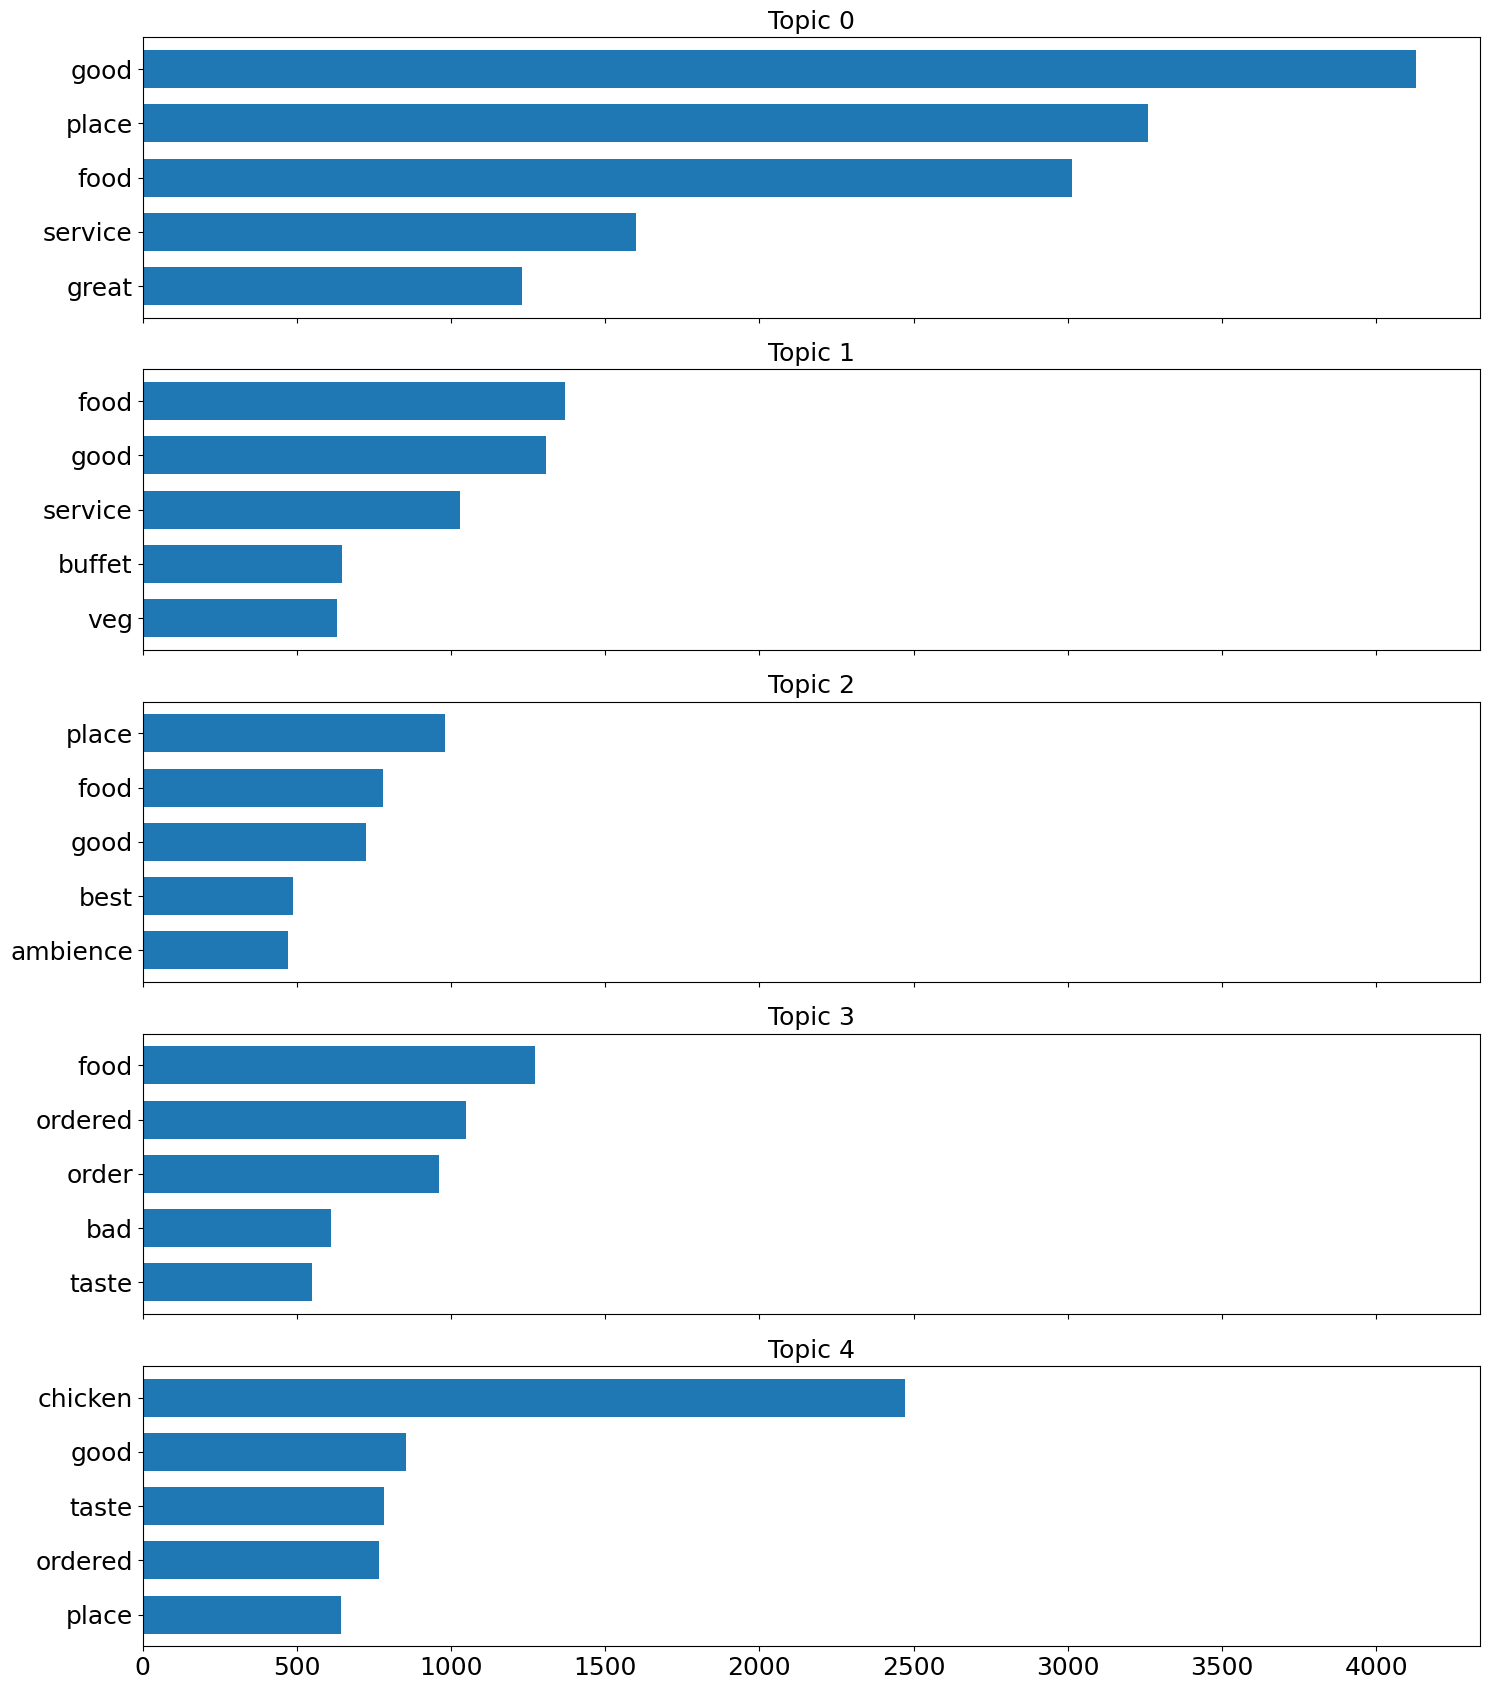

In [60]:
# Function to display top words for each topic with adjustable bar height
def display_topics_visual(model, feature_names, no_top_words, bar_spacing=5, bar_height=1.5):
    fig, axes = plt.subplots(len(model.components_), 1, figsize=(15, 17), sharex=True)  
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_weights = topic[topic.argsort()[:-no_top_words - 1:-1]]
        ax = axes[topic_idx]
        ax.barh(topic_words, topic_weights, height=bar_height)  
        ax.set_title(f"Topic {topic_idx}", fontsize=18)  
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=18) 
        
    plt.subplots_adjust(hspace=bar_spacing)  
    plt.tight_layout()
    plt.show()

# Example
no_top_words = 5
display_topics_visual(lda, countVectorizer.get_feature_names_out(), no_top_words, bar_spacing=6.0, bar_height=0.7)  

In Topic 0, the prevalent term is 'good,' while 'food' stands out in both Topic 1 and Topic 3. Topic 2 emphasizes the term 'place,' and in Topic 4, 'chicken' is the prominent term.

### Step 6.

#### Recommendation Algorithm: Collaborative Filtering

Collaborative filtering is a recommendation technique that predicts user preferences by finding similarities between users or items based on their interactions.

Unlike content-based filtering, which relies on detailed descriptions of items to make recommendations, collaborative filtering works without requiring any specific information about the products. Instead, it bases its recommendations on user behavior and interactions.

#### 1. Creating a Super-Score Rating

The Super-Score is calculated based on a combination of the Rating and the length of the Review for each row in the DataFrame. 

#### To develop a rating score that reflects each user's overall preference for a restaurant. 

In [61]:
# Function to calculate Super-Score
def calculate_super_score(row):
    # Example calculation: Weighted sum of Rating and length of Review
    rating_factor = row['Rating']
    review_length_factor = len(row['Review']) 
    super_score = rating_factor + (review_length_factor / 100)  
    return super_score

# Apply function to each row in the DataFrame to calculate Super-Score
DataFrame['Super-Score'] = DataFrame.apply(calculate_super_score, axis=1)

In [62]:
# Assuming DataFrame is your original DataFrame
super_score_column = DataFrame['Super-Score']

# Save super_score_column as a CSV file named 'Super_score.csv'
super_score_column.to_csv('Super_score.csv', index=False, header=['Super-Score'])

# Optionally, display the first few rows of the super_score_column
print(super_score_column.head())

0    6.56
1    5.96
2    6.37
3    5.84
4    6.14
Name: Super-Score, dtype: float64


In [63]:
# Creating df_selected from DataFrame with selected columns
df_selected = DataFrame[selected_columns]

In [64]:
# Assuming df_selected is your DataFrame with selected columns
df_selected.loc[:, 'Super-Score'] = DataFrame['Super-Score'].values

/var/folders/y9/8qqfv0vs4412zxq5gzd87z280000gn/T/ipykernel_59779/1065588794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Super-Score'] = DataFrame['Super-Score'].values


In [65]:
df_selected[df_selected['Super-Score']==0.0]

,Restaurant,Reviewer,Review,Rating,Time,Super-Score


In [66]:
# Assuming df_selected is your DataFrame with selected columns
df_selected.loc[:, 'Super-Score'] = DataFrame['Super-Score'].values

/var/folders/y9/8qqfv0vs4412zxq5gzd87z280000gn/T/ipykernel_59779/1065588794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Super-Score'] = DataFrame['Super-Score'].values


In [67]:
# Save df_selected as a CSV file named 'Super_score.csv'
df_selected.to_csv('cleaned.csv', index=False)
# Save to JSON file
df_selected.to_json('cleaned.json', orient='records', lines=True)

In [68]:
# To check whether there are any rows with zero super scores
df_selected[df_selected['Super-Score']==0.0]

,Restaurant,Reviewer,Review,Rating,Time,Super-Score


In [69]:
# Minimum Super Score Rating
df_selected['Super-Score'].min()

1.0

In [70]:
# Maximum Super Score Rating
df_selected['Super-Score'].max()

41.5

#### 2. Creating User-Item Matrix

 One key component of collaborative filtering is the User-Item Matrix, which organizes user-item interactions into a structured format suitable for analysis and recommendation generation.

In [71]:
# Top Restaurants based on Super Score Rating
df_selected.groupby('Restaurant')['Super-Score'].mean().sort_values(ascending = False).head()

Restaurant
Arena Eleven                                         7.715581
Hyderabadi Daawat                                    7.673300
American Wild Wings                                  7.429615
Jonathan's Kitchen - Holiday Inn Express & Suites    7.316000
Mazzo - Marriott Executive Apartments                7.289500
Name: Super-Score, dtype: float64

#### The Restaurant with the Highest Super Score Rating is Arena Eleven.

In [72]:
# Restaurants with the highest number of Review counts
df_selected.groupby('Restaurant')['Super-Score'].count().sort_values(ascending = False).head()

Restaurant
10 Downing Street         100
Karachi Bakery            100
SKYHY                     100
Royal Spicy Restaurant    100
Prism Club & Kitchen      100
Name: Super-Score, dtype: int64

In [73]:
# Creating the Matrix by using the Pivot Table Function
df_selected_rating = df_selected.pivot_table(index = 'Reviewer', columns = 'Restaurant', values = 'Super-Score')
df_selected_rating.head()

Restaurant,10 Downing Street,13 Dhaba,"3B's - Buddies, Bar & Barbecue",AB's - Absolute Barbecues,Absolute Sizzlers,Al Saba Restaurant,American Wild Wings,Amul,Arena Eleven,Aromas@11SIX,...,The Tilt Bar Republic,Tiki Shack,Triptify,Udipi's Upahar,Ulavacharu,Urban Asia - Kitchen & Bar,Yum Yum Tree - The Arabian Food Court,Zega - Sheraton Hyderabad Hotel,Zing's Northeast Kitchen,eat.fit
Reviewer,,,,,,,,,,,,,,,,,,,,,
#FOODPORN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,NaN,NaN
#chloesviews // CAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.55
$ign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4mybanti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.09,NaN,NaN,NaN,NaN,NaN
@FuloriBinaChutneyKaiseBani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Normalizing the Rating Scores
def mean_center_rows(df):
    return (df.T - df.mean(axis = 1)).T

df_selected_rating = mean_center_rows(df_selected_rating)
df_selected_rating.head()

Restaurant,10 Downing Street,13 Dhaba,"3B's - Buddies, Bar & Barbecue",AB's - Absolute Barbecues,Absolute Sizzlers,Al Saba Restaurant,American Wild Wings,Amul,Arena Eleven,Aromas@11SIX,...,The Tilt Bar Republic,Tiki Shack,Triptify,Udipi's Upahar,Ulavacharu,Urban Asia - Kitchen & Bar,Yum Yum Tree - The Arabian Food Court,Zega - Sheraton Hyderabad Hotel,Zing's Northeast Kitchen,eat.fit
Reviewer,,,,,,,,,,,,,,,,,,,,,
#FOODPORN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
#chloesviews // CAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
$ign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4mybanti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
@FuloriBinaChutneyKaiseBani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Filling all Null Values with 0.0
df_selected_rating = df_selected_rating.fillna(0)
df_selected_rating.head()

Restaurant,10 Downing Street,13 Dhaba,"3B's - Buddies, Bar & Barbecue",AB's - Absolute Barbecues,Absolute Sizzlers,Al Saba Restaurant,American Wild Wings,Amul,Arena Eleven,Aromas@11SIX,...,The Tilt Bar Republic,Tiki Shack,Triptify,Udipi's Upahar,Ulavacharu,Urban Asia - Kitchen & Bar,Yum Yum Tree - The Arabian Food Court,Zega - Sheraton Hyderabad Hotel,Zing's Northeast Kitchen,eat.fit
Reviewer,,,,,,,,,,,,,,,,,,,,,
#FOODPORN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#chloesviews // CAH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$ign,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4mybanti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
@FuloriBinaChutneyKaiseBani,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# Check Mean scores across Reviewer
df_selected_rating.mean(axis=1)

Reviewer
#FOODPORN                      0.000000e+00
#chloesviews // CAH            0.000000e+00
$ign                           0.000000e+00
4mybanti                       0.000000e+00
@FuloriBinaChutneyKaiseBani    0.000000e+00
                                   ...     
ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ                 0.000000e+00
ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ                   0.000000e+00
✌️✌️Reddy 🥂🍽️                  0.000000e+00
✔️ Sonu                        8.881784e-18
🍛🍲🥗                            8.881784e-18
Length: 7434, dtype: float64

In [77]:
df_selected_rating.mean(axis=1).isnull().sum()

0

### 3. Cosine Similarity

Cosine similarity is a measure used in natural language processing to determine the similarity between two non-zero vectors by calculating the cosine of the angle between them. 

It ranges from -1 to 1, where 1 indicates identical vectors, 0 indicates orthogonal (completely dissimilar) vectors, and -1 indicates diametrically opposite vectors.

In [78]:
# Overview of the Matrix 
print(df_selected_rating.shape)
df_selected_rating

(7434, 100)


Restaurant,10 Downing Street,13 Dhaba,"3B's - Buddies, Bar & Barbecue",AB's - Absolute Barbecues,Absolute Sizzlers,Al Saba Restaurant,American Wild Wings,Amul,Arena Eleven,Aromas@11SIX,...,The Tilt Bar Republic,Tiki Shack,Triptify,Udipi's Upahar,Ulavacharu,Urban Asia - Kitchen & Bar,Yum Yum Tree - The Arabian Food Court,Zega - Sheraton Hyderabad Hotel,Zing's Northeast Kitchen,eat.fit
Reviewer,,,,,,,,,,,,,,,,,,,,,
#FOODPORN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#chloesviews // CAH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$ign,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4mybanti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
@FuloriBinaChutneyKaiseBani,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
✌️✌️Reddy 🥂🍽️,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# Converting the Matrix DataFrame into a NumPy array
data_matrix = df_selected_rating.to_numpy()
data_matrix[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

### 4. Truncated SVD

Truncated SVD (Singular Value Decomposition) is a dimensionality reduction technique that approximates a large matrix by decomposing it into its singular vectors and selecting only the top components. This helps in reducing the computational complexity while preserving the essential structure and relationships within the data.

NUMBER_OF_FACTORS_MF: Number of factors used to factorize the user-item matrix.
    
U, sigma, Vt: These variables store the output of SVD:
        
U (shape: m x k): Left singular vectors representing user vectors.
sigma (shape: k x k): Diagonal matrix of singular values.
Vt (shape: k x n): Right singular vectors representing item vectors

In [80]:
# Applying Singular Value Decomposition (SVD)
#The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15
#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(data_matrix, k = NUMBER_OF_FACTORS_MF)

print(U.shape)
print(Vt.shape)

sigma = np.diag(sigma)
sigma.shape

(7434, 15)
(15, 100)


(15, 15)

In [81]:
# Overview of user ratings across all Restaurants

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings    

array([[-7.38963427e-18, -1.92366462e-16, -6.32146580e-17, ...,
        -6.98828459e-17,  4.01886461e-16,  2.40200409e-16],
       [ 6.19002308e-17,  1.84035147e-16,  9.28719725e-17, ...,
         1.41002250e-17, -1.84412354e-16, -3.11977626e-16],
       [ 2.80343172e-17, -8.81480486e-17,  9.87569597e-18, ...,
         9.14837208e-18, -4.73987126e-17, -3.07984003e-16],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.87343176e-02, -1.66200573e-02,  2.68446904e-02, ...,
         6.13106441e-03,  2.08879277e-01, -2.77460987e-02],
       [ 7.27048082e-04,  2.24974399e-03,  3.36113773e-04, ...,
         1.36470872e-03,  1.80615513e-03,  2.14721992e-03]])

In [82]:
# Converting the reconstructed matrix back to a Pandas dataframe
# List of first 10 Restaurants in the Matrix
user_ids = list(df_selected_rating.index)

cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_selected_rating.columns, index=user_ids).transpose()
print(cf_preds_df.shape)
cf_preds_df


(100, 7434)


,#FOODPORN,#chloesviews // CAH,$ign,4mybanti,@FuloriBinaChutneyKaiseBani,@Vignesh #FoodMad,@foodie.amy6 | AMNA,A K,A K RAJEEV,A Vinod Kumar,...,প্রমিলা মুখার্জি,ధర్మపురి హరీష్,ప్రత్యూష సూరేపల్లి,మహారాజ్ కిషోర్,విజయ్ కుమార్ తెజవత్,ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,✌️✌️Reddy 🥂🍽️,✔️ Sonu,🍛🍲🥗
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,-7.389634e-18,6.190023e-17,2.803432e-17,9.937479e-17,-5.320384e-18,-4.578865e-17,-6.089627e-17,3.285211e-17,4.396546e-18,3.809133e-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.068734,0.000727
13 Dhaba,-1.923665e-16,1.840351e-16,-8.814805e-17,2.051118e-16,-1.520611e-16,2.853960e-17,-3.053446e-16,1.265657e-16,6.740658e-17,1.366598e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.016620,0.002250
"3B's - Buddies, Bar & Barbecue",-6.321466e-17,9.287197e-17,9.875696e-18,1.085478e-16,-4.926047e-18,5.800420e-18,4.514149e-18,1.060664e-17,3.454295e-17,-5.317666e-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026845,0.000336
AB's - Absolute Barbecues,-5.723525e-17,9.058999e-17,3.532069e-17,7.068158e-17,4.833167e-16,1.419289e-16,1.369395e-17,-1.866420e-16,-1.111622e-17,-7.502044e-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027534,0.002491
Absolute Sizzlers,4.369821e-18,1.016930e-17,2.725417e-17,-2.351017e-17,3.741945e-17,1.634932e-17,2.391452e-17,-9.422446e-18,-3.885916e-18,-2.013208e-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.011821,-0.001100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Urban Asia - Kitchen & Bar,-2.493524e-16,5.815224e-17,-5.340026e-17,6.667104e-17,-6.508573e-17,-7.045135e-17,-9.373626e-17,9.202030e-17,-7.310199e-17,1.650371e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.082960,-0.000095
Yum Yum Tree - The Arabian Food Court,-1.722054e-17,3.596580e-17,-7.386368e-17,3.759319e-17,-1.213781e-16,2.630559e-17,-1.295182e-16,6.480031e-17,7.917284e-17,1.634809e-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010385,0.001027
Zega - Sheraton Hyderabad Hotel,-6.988285e-17,1.410023e-17,9.148372e-18,1.042845e-16,-8.382564e-17,-2.962542e-17,-1.002014e-17,2.105433e-17,1.946928e-17,-2.523898e-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006131,0.001365


#### 5. Item-Item Matrix

An Item-Item Matrix, also known as an Item-Item Similarity Matrix, is a matrix that measures the similarity between items (or products) based on user interactions. Unlike the User-Item Matrix, which focuses on user preferences for items, the Item-Item Matrix focuses on relationships between items themselves.

In [83]:
# Creating Item-Item Matrix based on Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
item_item_matrix = cosine_similarity(cf_preds_df)
item_item_matrix= pd.DataFrame(item_item_matrix, columns=cf_preds_df.index, index = cf_preds_df.index)
item_item_matrix.head()

Restaurant,10 Downing Street,13 Dhaba,"3B's - Buddies, Bar & Barbecue",AB's - Absolute Barbecues,Absolute Sizzlers,Al Saba Restaurant,American Wild Wings,Amul,Arena Eleven,Aromas@11SIX,...,The Tilt Bar Republic,Tiki Shack,Triptify,Udipi's Upahar,Ulavacharu,Urban Asia - Kitchen & Bar,Yum Yum Tree - The Arabian Food Court,Zega - Sheraton Hyderabad Hotel,Zing's Northeast Kitchen,eat.fit
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,1.000000,0.076099,-0.348531,-0.014166,0.289209,0.035838,-0.043865,0.286612,-0.147915,0.044126,...,0.140056,0.142718,-0.218865,-0.102132,0.215273,0.191106,0.412355,-0.142846,-0.304655,-0.259673
13 Dhaba,0.076099,1.000000,-0.129070,0.252308,-0.228609,0.101877,0.083790,0.035549,0.079221,0.123824,...,0.095806,-0.082019,0.063024,-0.078169,-0.221315,0.271106,0.604082,0.169065,-0.352800,0.053123
"3B's - Buddies, Bar & Barbecue",-0.348531,-0.129070,1.000000,0.204658,-0.262523,0.057070,-0.035071,-0.348072,0.035085,-0.607422,...,0.051611,-0.272477,0.677986,-0.040603,0.128379,-0.346249,0.086099,0.208591,0.357227,0.317956
AB's - Absolute Barbecues,-0.014166,0.252308,0.204658,1.000000,0.036982,-0.012779,0.037405,-0.128332,0.045640,-0.093219,...,-0.169404,0.009622,0.046975,0.062894,-0.020601,-0.141671,0.133339,-0.023527,-0.084822,0.136785
Absolute Sizzlers,0.289209,-0.228609,-0.262523,0.036982,1.000000,0.167203,0.254075,0.390892,-0.216632,0.324044,...,0.163052,0.134547,-0.163168,-0.209857,-0.285791,0.303576,-0.229086,-0.530771,-0.479737,-0.395190


In [84]:
# Creating Collaborative Filtering Function for Restaurant-Restaurant Recommendation System

def cf_recommender(restaurant):
    
    """Getting the correlation of a specific restaurant with other Restaurants"""
    restaurant_ratings = cf_preds_df.T[restaurant]
    similar_restaurant_ratings = cf_preds_df.T.corrwith(restaurant_ratings)
    corr_ratings = pd.DataFrame(similar_restaurant_ratings, columns=['Correlation'])
    corr_ratings.dropna(inplace=True)
    
    """Retrieving the Ratings Scores from the Item-Item Matrix"""
    ratings_sim = item_item_matrix[restaurant]
    
    """Filtering for positively correlated restaurants"""
    ratings_sim = ratings_sim[ratings_sim>0]
    
    """Generate Top 10 Recommended Restaurants"""
    """Exclude top row as that will be the same restaurant"""
    return ratings_sim.sort_values(ascending= False).head(11)[1:]

#### Top 10 Recommended Restaurants that people should visit if they had previously visited Beyond Flavours.

In [97]:
restaurant_recommendations = cf_recommender('Beyond Flavours')
restaurant_recommendations = pd.DataFrame(data = restaurant_recommendations)
restaurant_recommendations

,Beyond Flavours
Restaurant,
Owm Nom Nom,0.938233
Domino's Pizza,0.894242
Diners Pavilion,0.875274
Asian Meal Box,0.783974
Karachi Cafe,0.760770
Green Bawarchi Restaurant,0.592854
Hunger Maggi Point,0.531484
American Wild Wings,0.495833
Triptify,0.481616


In [99]:
# Save the recommendations to a CSV file
restaurant_recommendations.to_csv('top_recommended_restaurants.csv', header=True)

#### Comparing the Super Score Ratings and Restaurants between Beyond Flavours and the 3 highest recommended restaurants.

In [86]:
restaurant = df_selected[df_selected['Restaurant'] == 'Beyond Flavours'][['Restaurant','Review','Super-Score']]
restaurant.head()

,Restaurant,Review,Super-Score
0,Beyond Flavours,ambience good food quite good saturday lunch c...,6.56
1,Beyond Flavours,ambience good pleasant evening service prompt ...,5.96
2,Beyond Flavours,must try great food great ambience thnx servic...,6.37
3,Beyond Flavours,soumen das arun great guy behavior sincerety g...,5.84
4,Beyond Flavours,food good ordered kodi drumsticks basket mutto...,6.14


In [87]:
restaurant_1 = df_selected[df_selected['Restaurant'] == 'Owm Nom Nom'][['Restaurant','Review','Super-Score']]
restaurant_1.head()

,Restaurant,Review,Super-Score
4500,Owm Nom Nom,veg biryani serve good loved located well near...,4.06
4501,Owm Nom Nom,bad biryani ordered fry biryani brought dum bi...,2.54
4502,Owm Nom Nom,worst experience ever food spoiled informed st...,3.03
4503,Owm Nom Nom,extremely rude staff costing like anything u s...,1.96
4504,Owm Nom Nom,place even deserve star worst ever experience ...,3.55


In [88]:
restaurant_2 = df_selected[df_selected['Restaurant'] == "Domino's Pizza"][['Restaurant','Review','Super-Score']]
restaurant_2.head()

,Restaurant,Review,Super-Score
8800,Domino's Pizza,ordered dominos life store ever bad order arri...,6.20
8801,Domino's Pizza,pathetic service food arrived hours cold apolo...,2.01
8802,Domino's Pizza,worst experience dominos air conditioner store...,1.97
8803,Domino's Pizza,ordered pizza extra cheese extra cheese cant i...,1.94
8804,Domino's Pizza,domino live standards ordered pizza late deliv...,4.10


In [89]:
restaurant_3 = df_selected[df_selected['Restaurant'] == "Diners Pavilion"][['Restaurant','Review','Super-Score']]
restaurant_3.head()

,Restaurant,Review,Super-Score
5300,Diners Pavilion,classy restaurant gachibowli area serves super...,6.42
5301,Diners Pavilion,closed th may mentioned zomato please call vis...,1.97
5302,Diners Pavilion,taste really good non veg starters veg paneer ...,6.17
5303,Diners Pavilion,kalmi kebab lemon coriander soup time fav comb...,5.32
5304,Diners Pavilion,ambience food okish taken buffet much options ...,3.10


In [90]:
# Top 10 Recommended Restaurants that people should visit if they had previously visited Paradise

restaurant_recommendations = cf_recommender('Paradise')
restaurant_recommendations = pd.DataFrame(data = restaurant_recommendations)
restaurant_recommendations

,Paradise
Restaurant,
Pot Pourri,0.938874
Amul,0.893044
Khaan Saab,0.673994
The Fisherman's Wharf,0.558330
Al Saba Restaurant,0.557634
Hotel Zara Hi-Fi,0.539773
Hyderabad Chefs,0.516762
Tempteys,0.479173
Shah Ghouse Hotel & Restaurant,0.357233


In [91]:
restaurant = df_selected[df_selected['Restaurant'] == 'Paradise'][['Restaurant','Review','Super-Score']]
restaurant.head()

,Restaurant,Review,Super-Score
100,Paradise,paradise biryani really good service also good...,6.17
101,Paradise,chiken biryani good spcal chiken cary good tes...,5.98
102,Paradise,good hospitality good ambiance good food v goo...,6.31
103,Paradise,good food tasty better music food better quick...,5.88
104,Paradise,goodtaste ever paradise makes magic chefs glad...,6.08


Comparing the Super Score Ratings and Restaurants between Paradise and the 3 highest recommended restaurants.

In [92]:
restaurant_1 = df_selected[df_selected['Restaurant'] == 'Pot Pourri'][['Restaurant','Review','Super-Score']]
restaurant_1.head()

,Restaurant,Review,Super-Score
3000,Pot Pourri,bad experience masala papad went dinner collea...,4.82
3001,Pot Pourri,nice ambiance different delicious food polite ...,6.16
3002,Pot Pourri,affordable good food would given star value mo...,5.23
3003,Pot Pourri,worst experience food service food great servi...,2.13
3004,Pot Pourri,reading sitll going place either work du b str...,12.34


In [93]:
restaurant_2 = df_selected[df_selected['Restaurant'] == "Amul"][['Restaurant','Review','Super-Score']]
restaurant_2.head()

,Restaurant,Review,Super-Score
2300,Amul,place prefer good taste enjoyment levels ice c...,5.84
2301,Amul,ordered amul order looking late night binge fo...,6.34
2302,Amul,thank serving testy milkshakes late night sugg...,6.09
2303,Amul,although go onsite store ordered ice cream yum...,6.34
2304,Amul,small ice cream parlour good ice cream ate dea...,6.85


In [94]:
restaurant_3 = df_selected[df_selected['Restaurant'] == "Khaan Saab"][['Restaurant','Review','Super-Score']]
restaurant_3.head()

,Restaurant,Review,Super-Score
7800,Khaan Saab,ambience good ofcourse food ordered spicy chic...,4.93
7801,Khaan Saab,date visit may ambience service quality taste ...,5.64
7802,Khaan Saab,worst service life wait hours main course late...,3.65
7803,Khaan Saab,khaan saab vijayawada earlier loved food ambie...,6.75
7804,Khaan Saab,khaan saab couple days went gone reviews zomat...,4.24


#### Conclusion


A restaurant recommender system utilizes customer similarity to suggest dining options based on their preferences and behaviors. By analyzing patterns in user interactions with restaurants, these systems enhance user experience by offering personalized recommendations that align closely with individual tastes and interests. This approach not only increases customer satisfaction but also fosters engagement and loyalty by consistently delivering relevant dining choices.


#### References 

1. CateGitau. (2021). restaurant-recommendation-system. GitHub. https://github.com/CateGitau/restaurant-recommendation-system/tree/main


2. Priyanka. (2022). Restaurant Recommendation using collaborative filtering. Medium https://medium.com/@pu231195/restaurant-recommendation-using-collaborative-filtering-b5f7634c6534